# What is the reason behind Heart disease

# Introduction
'''
Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others.

The term "heart disease" is often used interchangeably with the term "cardiovascular disease." Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart's muscle, valves or rhythm, also are considered forms of heart disease.
'''

In [50]:
#NOTE Import Datas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve ,auc #NOTE for model evaluation

In [51]:
np.random.seed(101) #ensure reproducibility
pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [52]:
cwd = os.getcwd()
DataPath = cwd + '/Data/heart.csv'
print("Current working directory",cwd)
print("Data Directory",DataPath)

Current working directory /home/ibrahim/Repos/Heart-Disease
Data Directory /home/ibrahim/Repos/Heart-Disease/Data/heart.csv


In [53]:
df = pd.read_csv(DataPath)

In [54]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

- **age**: The persIt's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,
on's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

To avoid [HARKing](https://journals.sagepub.com/doi/abs/10.1207/s15327957pspr0203_4) (or Hypothesizing After the Results are Known) I'm going to take a look at online guides on how heart disease is diagnosed, and look up some of the terms above.

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124), ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests).

Looking at information of heart disease risk factors led me to the following: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking** [3](https://www.bhf.org.uk/informationsupport/risk-factors). According to another source [4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack), the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that **thalassemia**, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the *more* major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

In [55]:
print("Data properties:",df.columns[:])

Data properties: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [56]:
y = df["target"] 
x = df[df.columns[:-1]]

In [57]:
neg = []
pos = []
for i in range(len(y)):
    if (y[i] == 0):
        neg.append(y[i])
        continue
    pos.append(y[i])     

Text(0.5, 1.0, 'Disease frequency')

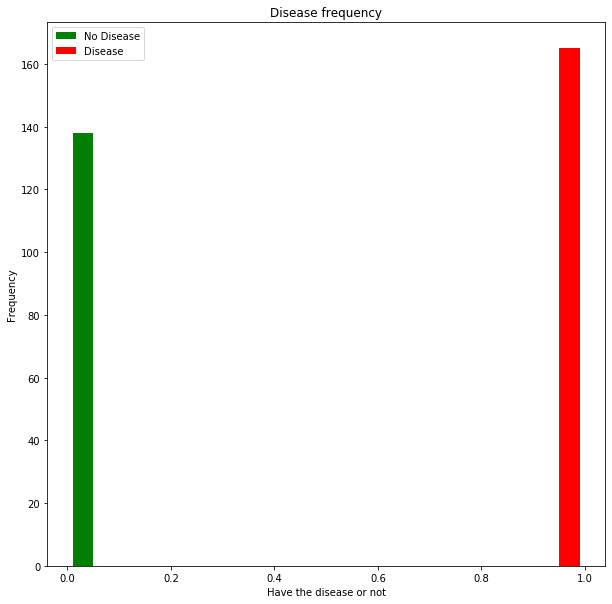

In [58]:
#0 = no, 1 = yes
legend = ['No Disease', 'Disease']
plt.figure(figsize=(10,10))
plt.hist([neg,pos], color=["green","red"])
plt.legend(legend)
plt.xlabel("Have the disease or not")
plt.ylabel("Frequency")
plt.title("Disease frequency")

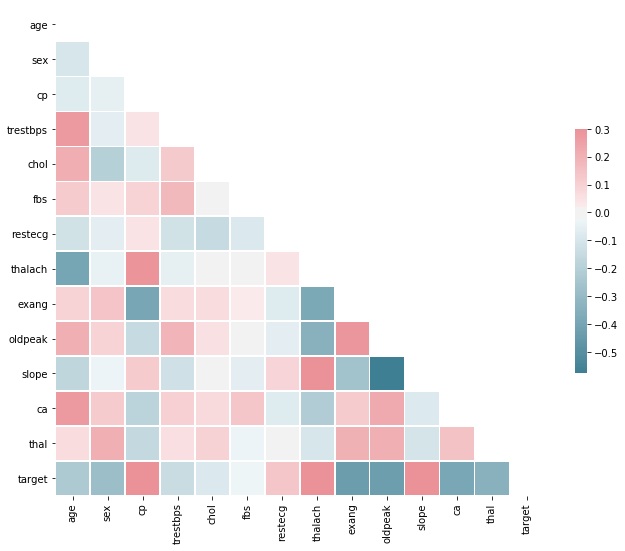

In [59]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It's a clear easy to notice that our data is not correalated with the targert.
Less technically, target property is not connected with other properties with linear relation.

In [60]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [61]:
#Automate model creation , fitting and testing
def ModelBind(func):
    model = func()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    ax = plt.gca()
    disp = plot_roc_curve(model,x_test, y_test, ax=ax, alpha=0.8)
    plt.show()
    #print("{} Error is ".format(modelName) + str(modelerr))

In [68]:
def Log(modelName,modelerr):
    print("{} Error is ".format(modelName) + str(modelerr))

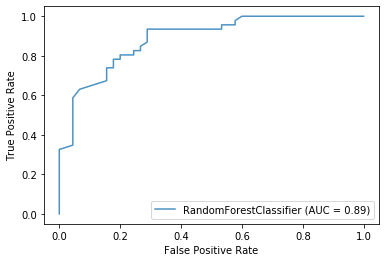

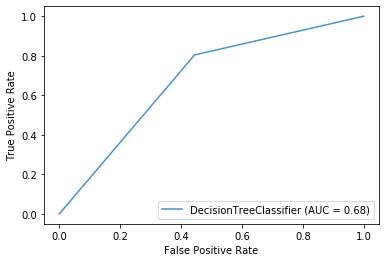

In [70]:
#TODO Fix this to be encpsulated
#LinearRegressionError = ModelBind(LinearRegression)
RandomForestError = ModelBind(RandomForestClassifier)
DecisionTreeError = ModelBind(DecisionTreeClassifier)

In [ ]:
Log("Linear Regression",LinearRegressionError)
Log("Random forest",RandomForestError)
Log("Decision Tree classifier", DecisionTreeError)

In [ ]:
#TEST 
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(model,x_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [ ]:
#Classification Evaluation
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test)):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_test).reshape(1,-1)[:,i], y_pred.reshape(1,-1)[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])